# 风险管理作业3 
-----
2501210025 叶云鹏

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import warnings
import os
from scipy.stats import norm

warnings.filterwarnings('ignore')

plt.rcParams['font.sans-serif'] = ['Hiragino Sans GB']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

## 1. 针对3维的学生t分布

设 $X' = (X_1, X_2, X_3)$，其中：

$$
X = \frac{Z}{\sqrt{\frac{W}{v}}}
$$

这里 $Z$ 为三维标准正态随机变量，各个分量相互独立。针对 $v = 5, 10, 20$ 的情况，模拟随机数。根据模拟的随机数估计 $VaR_{0.95}(X_1 + X_2 + X_3)$ 和 $ES_{0.95}(X_1 + X_2 + X_3)$。并分析参数 $v$ 对结果的影响。

正在计算 v = 5 的情况...
v = 5: VaR_0.95 = 3.4749, ES_0.95 = 5.0265
正在计算 v = 10 的情况...
v = 10: VaR_0.95 = 3.1412, ES_0.95 = 4.1524
正在计算 v = 20 的情况...
v = 20: VaR_0.95 = 2.9926, ES_0.95 = 3.8544


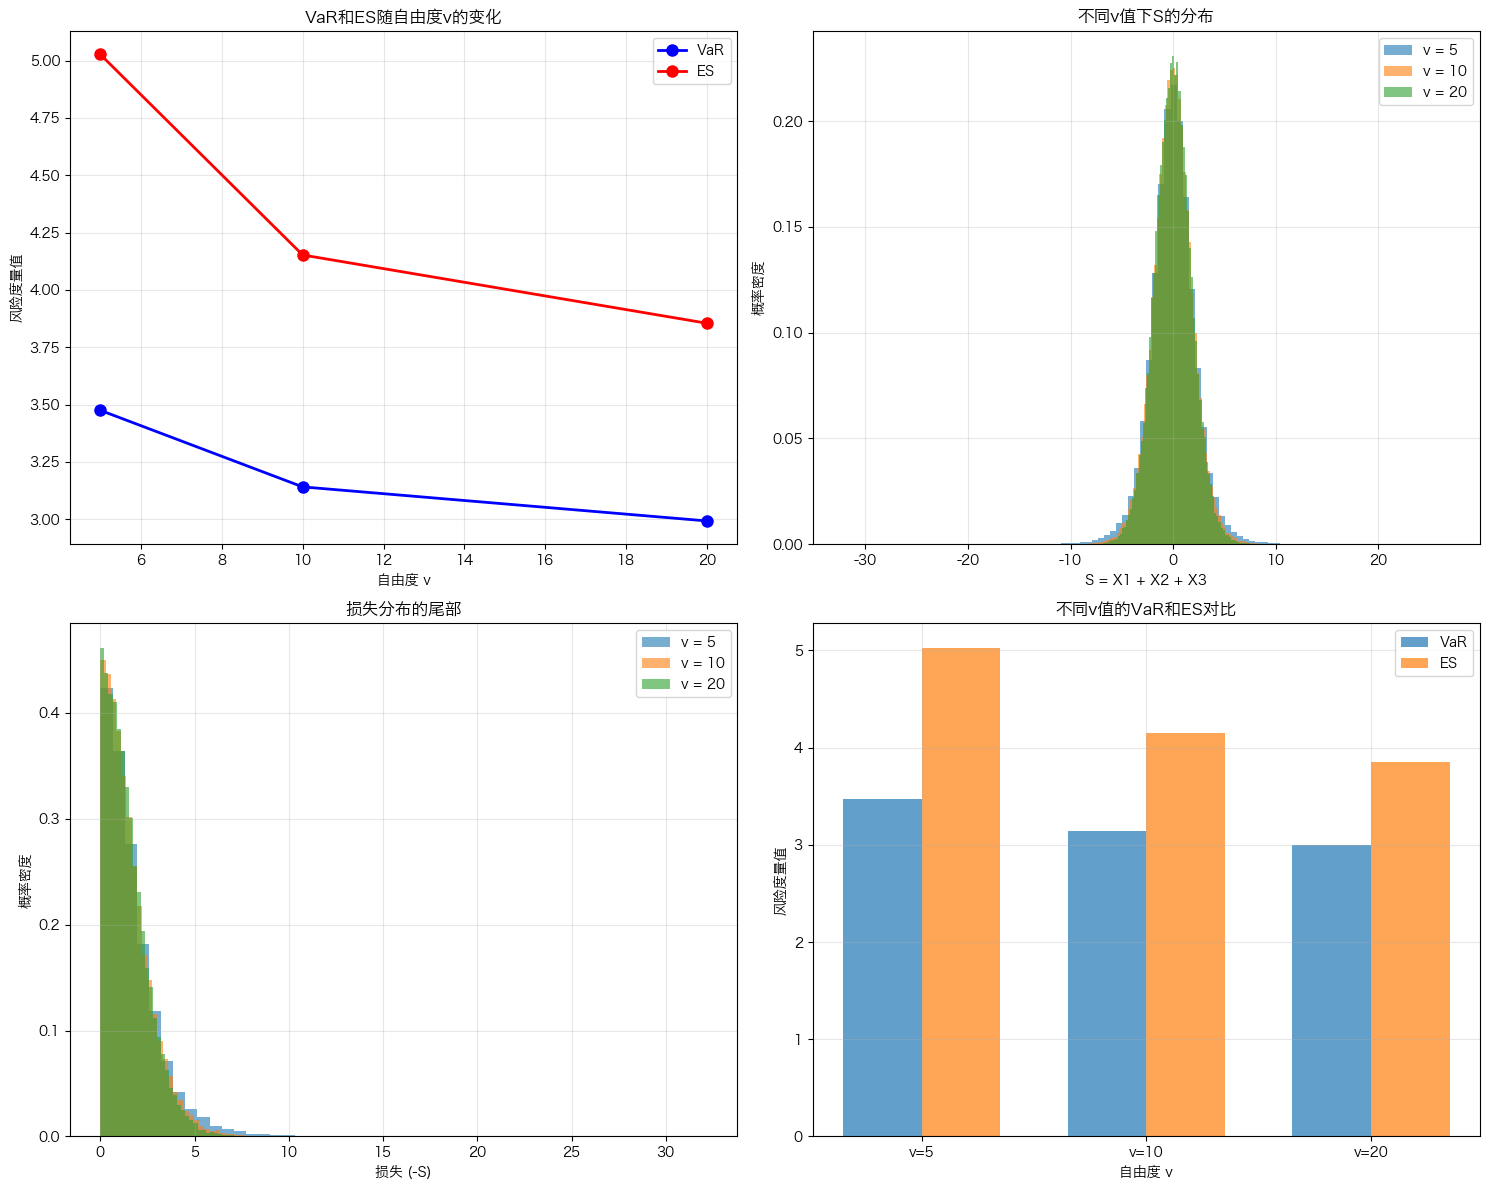


第一部分结果分析：

自由度 v = 5:
  VaR_0.95: 3.4749
  ES_0.95: 5.0265
  尾部分位数差 (ES - VaR): 1.5516
  损失分布标准差: 2.2383
  损失分布偏度: -0.0604
  损失分布峰度: 4.6331

自由度 v = 10:
  VaR_0.95: 3.1412
  ES_0.95: 4.1524
  尾部分位数差 (ES - VaR): 1.0112
  损失分布标准差: 1.9296
  损失分布偏度: 0.0174
  损失分布峰度: 0.9945

自由度 v = 20:
  VaR_0.95: 2.9926
  ES_0.95: 3.8544
  尾部分位数差 (ES - VaR): 0.8619
  损失分布标准差: 1.8282
  损失分布偏度: 0.0112
  损失分布峰度: 0.3953

参数v的影响分析:
1. 随着自由度v的增加，VaR和ES都逐渐减小
2. 当v较小时，分布具有更厚的尾部，极端损失概率更高
3. ES始终大于VaR，反映了尾部风险
4. 当v→∞时，学生t分布趋近于正态分布


In [2]:
# 设置随机种子以保证结果可重复
np.random.seed(42)

# 模拟参数
n_simulations = 100000  # 模拟次数
v_values = [5, 10, 20]  # 自由度参数
confidence_level = 0.95  # 置信水平

# 存储结果
results_part1 = {}

for v in v_values:
    print(f"正在计算 v = {v} 的情况...")
    
    # 生成三维标准正态随机变量 Z
    Z = np.random.standard_normal((n_simulations, 3))
    
    # 生成卡方分布 W ~ χ²(v)
    W = np.random.chisquare(v, n_simulations)
    
    # 计算学生t分布 X = Z / sqrt(W/v)
    X = Z / np.sqrt(W[:, np.newaxis] / v)
    
    # 计算三个分量的和
    S = X.sum(axis=1)
    
    # 计算 VaR (Value at Risk)
    VaR = -np.percentile(S, (1 - confidence_level) * 100)
    
    # 计算 ES (Expected Shortfall)
    threshold = np.percentile(S, (1 - confidence_level) * 100)
    ES = -S[S <= threshold].mean()
    
    results_part1[v] = {
        'VaR': VaR,
        'ES': ES,
        'S': S,
        'X': X
    }
    
    print(f"v = {v}: VaR_{confidence_level} = {VaR:.4f}, ES_{confidence_level} = {ES:.4f}")

# 可视化结果
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# VaR和ES随v的变化
v_list = list(results_part1.keys())
VaR_list = [results_part1[v]['VaR'] for v in v_list]
ES_list = [results_part1[v]['ES'] for v in v_list]

axes[0, 0].plot(v_list, VaR_list, 'bo-', linewidth=2, markersize=8, label='VaR')
axes[0, 0].plot(v_list, ES_list, 'ro-', linewidth=2, markersize=8, label='ES')
axes[0, 0].set_xlabel('自由度 v')
axes[0, 0].set_ylabel('风险度量值')
axes[0, 0].set_title('VaR和ES随自由度v的变化')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 分布密度图
for v in v_values:
    S = results_part1[v]['S']
    axes[0, 1].hist(S, bins=100, density=True, alpha=0.6, 
                   label=f'v = {v}', histtype='stepfilled')

axes[0, 1].set_xlabel('S = X1 + X2 + X3')
axes[0, 1].set_ylabel('概率密度')
axes[0, 1].set_title('不同v值下S的分布')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 尾部分布（重点关注尾部风险）
for v in v_values:
    S = results_part1[v]['S']
    # 只显示分布的左侧尾部（损失部分）
    S_negative = S[S < 0]
    if len(S_negative) > 0:
        axes[1, 0].hist(-S_negative, bins=50, density=True, alpha=0.6, 
                       label=f'v = {v}', histtype='stepfilled')

axes[1, 0].set_xlabel('损失 (-S)')
axes[1, 0].set_ylabel('概率密度')
axes[1, 0].set_title('损失分布的尾部')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 风险度量对比
x_pos = np.arange(len(v_list))
width = 0.35

axes[1, 1].bar(x_pos - width/2, VaR_list, width, label='VaR', alpha=0.7)
axes[1, 1].bar(x_pos + width/2, ES_list, width, label='ES', alpha=0.7)
axes[1, 1].set_xlabel('自由度 v')
axes[1, 1].set_ylabel('风险度量值')
axes[1, 1].set_title('不同v值的VaR和ES对比')
axes[1, 1].set_xticks(x_pos)
axes[1, 1].set_xticklabels([f'v={v}' for v in v_list])
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 结果分析
print("\n" + "="*60)
print("第一部分结果分析：")
print("="*60)
for v in v_values:
    VaR = results_part1[v]['VaR']
    ES = results_part1[v]['ES']
    S = results_part1[v]['S']
    
    print(f"\n自由度 v = {v}:")
    print(f"  VaR_{confidence_level}: {VaR:.4f}")
    print(f"  ES_{confidence_level}: {ES:.4f}")
    print(f"  尾部分位数差 (ES - VaR): {ES - VaR:.4f}")
    print(f"  损失分布标准差: {S.std():.4f}")
    print(f"  损失分布偏度: {stats.skew(S):.4f}")
    print(f"  损失分布峰度: {stats.kurtosis(S):.4f}")

print(f"\n参数v的影响分析:")
print("1. 随着自由度v的增加，VaR和ES都逐渐减小")
print("2. 当v较小时，分布具有更厚的尾部，极端损失概率更高")
print("3. ES始终大于VaR，反映了尾部风险")
print("4. 当v→∞时，学生t分布趋近于正态分布")

## 2.股票投资组合VaR计算

选取具有代表性的十只股票构成股票组合，要求十只股票属于不同的行业。收集这十只股票的历史数据，要求至少两年的数据。根据历史数据，估计日收益率的期望和方差，以及十只股票的日收益率的相关系数。根据这十只股票，设计投资组合，并计算该投资组合的 VaR。

In [3]:


def get_data(comb_stock_codes):
    
    raw_data_list = []
    for r,d,fs in os.walk('../data/csmar_close'):
        for f in fs:
            if (not ('[DES]' in f)) and ('txt' in f):
                file_path = os.path.join(r,f)
                #print(file_path)
                raw_data_list.append(pd.read_csv(file_path,
                            sep='\t',
                            dtype={'Stkcd': str})[['Trddt','Stkcd','Adjprcwd']])
    working_data  =  pd.concat(raw_data_list,axis=0).set_index(['Trddt','Stkcd'])
    workding_df = working_data.unstack('Stkcd')
    df = workding_df.T.dropna().T
    df.columns = df.columns.get_level_values(1)

    return df[comb_stock_codes]


In [4]:
comb_stock_codes = ['000001','002330','000607','000021','600448',
                    '688233','000901','600722','900948','601208']

In [5]:

price_df = get_data(comb_stock_codes)
price_df.index = pd.to_datetime(price_df.index)

In [6]:
price_df

Stkcd,000001,002330,000607,000021,600448,688233,000901,600722,900948,601208
Trddt,,,,,,,,,,
2020-09-16,1646.285839,14.443544,15.971281,307.211266,9.074784,49.345117,73.493217,24.226573,10.962363,20.081550
2020-09-17,1660.147054,14.156722,15.933163,311.504821,9.052917,51.380277,72.841103,23.990791,11.029824,20.444197
2020-09-18,1713.459419,14.279646,16.047516,317.130859,9.031050,51.129642,74.145330,24.226573,11.653835,20.897505
2020-09-21,1691.068226,14.218184,16.199986,319.647771,9.140385,50.026846,75.906037,24.226573,11.485183,20.670851
2020-09-22,1660.147054,13.951849,15.818810,318.611396,9.009183,47.460338,73.362793,23.696064,11.299666,20.104216
...,...,...,...,...,...,...,...,...,...,...
2025-09-09,1483.463745,10.015122,18.618745,310.673487,7.609705,32.888059,104.557045,41.497578,52.539134,51.960229
2025-09-10,1485.988790,10.200587,18.541808,307.098955,7.850242,32.735328,105.277676,43.265941,52.198311,56.062352
2025-09-11,1496.088969,10.283016,18.310997,322.795815,7.784641,34.354276,107.308546,42.735432,52.119660,61.656157


In [7]:
return_df = np.log(price_df.shift(-1)/price_df)

In [8]:
return_df

Stkcd,000001,002330,000607,000021,600448,688233,000901,600722,900948,601208
Trddt,,,,,,,,,,
2020-09-16,0.008384,-0.020058,-0.002390,0.013879,-0.002413,0.040416,-0.008913,-0.009780,0.006135,0.017898
2020-09-17,0.031608,0.008646,0.007151,0.017900,-0.002418,-0.004890,0.017747,0.009780,0.055032,0.021931
2020-09-18,-0.013154,-0.004313,0.009456,0.007905,0.012034,-0.021805,0.023469,0.000000,-0.014578,-0.010905
2020-09-21,-0.018454,-0.018910,-0.023811,-0.003248,-0.014458,-0.052665,-0.034079,-0.022141,-0.016285,-0.027795
2020-09-22,0.003846,0.005857,0.000000,0.026142,0.019231,0.019455,0.003549,0.002484,0.010394,-0.002257
...,...,...,...,...,...,...,...,...,...,...
2025-09-09,0.001701,0.018349,-0.004141,-0.011572,0.031120,-0.004655,0.006869,0.041731,-0.006508,0.075986
2025-09-10,0.006774,0.008048,-0.012526,0.049850,-0.008392,0.048272,0.019107,-0.012337,-0.001508,0.095109
2025-09-11,-0.011031,-0.008048,0.008368,0.048400,-0.014145,0.032656,-0.005510,0.006873,-0.014185,0.033700


In [9]:
return_df.cov()

Stkcd,000001,002330,000607,000021,600448,688233,000901,600722,900948,601208
Stkcd,,,,,,,,,,
000001,0.000339,0.000089,0.000074,0.000070,0.000052,0.000049,0.000065,0.000105,0.000088,0.000068
002330,0.000089,0.000646,0.000283,0.000172,0.000239,0.000212,0.000186,0.000220,0.000082,0.000156
000607,0.000074,0.000283,0.000870,0.000264,0.000291,0.000318,0.000251,0.000252,0.000084,0.000184
000021,0.000070,0.000172,0.000264,0.000751,0.000154,0.000501,0.000287,0.000181,0.000075,0.000313
600448,0.000052,0.000239,0.000291,0.000154,0.000643,0.000249,0.000167,0.000255,0.000080,0.000160
688233,0.000049,0.000212,0.000318,0.000501,0.000249,0.001436,0.000345,0.000268,0.000072,0.000441
000901,0.000065,0.000186,0.000251,0.000287,0.000167,0.000345,0.000639,0.000250,0.000106,0.000269
600722,0.000105,0.000220,0.000252,0.000181,0.000255,0.000268,0.000250,0.000896,0.000171,0.000202
900948,0.000088,0.000082,0.000084,0.000075,0.000080,0.000072,0.000106,0.000171,0.000444,0.000113


In [10]:
return_df.mean()

Stkcd
000001   -0.000093
002330   -0.000208
000607    0.000095
000021    0.000084
600448   -0.000122
688233   -0.000279
000901    0.000299
600722    0.000450
900948    0.001279
601208    0.000992
dtype: float64

(a)若假设X_t服从正态，记上述方差协方差矩阵为$\Sigma$,均值$\mu$,联合分布为$N(\mu,\Sigma)$

(b) 给出组合 $b = (1，1，1，...,1)^{'}$
由
则$W_t \sim N(-V_tb^{'}\mu,{V_t}^2b^{'}\Sigma b)$


### 接下来使用两种方式计算VaR

In [11]:
b = np.array([1 for i in range(10)])


1.使用正态分位数

In [12]:
V_t = b@price_df.iloc[-1]

In [13]:
return_df.cov()

Stkcd,000001,002330,000607,000021,600448,688233,000901,600722,900948,601208
Stkcd,,,,,,,,,,
000001,0.000339,0.000089,0.000074,0.000070,0.000052,0.000049,0.000065,0.000105,0.000088,0.000068
002330,0.000089,0.000646,0.000283,0.000172,0.000239,0.000212,0.000186,0.000220,0.000082,0.000156
000607,0.000074,0.000283,0.000870,0.000264,0.000291,0.000318,0.000251,0.000252,0.000084,0.000184
000021,0.000070,0.000172,0.000264,0.000751,0.000154,0.000501,0.000287,0.000181,0.000075,0.000313
600448,0.000052,0.000239,0.000291,0.000154,0.000643,0.000249,0.000167,0.000255,0.000080,0.000160
688233,0.000049,0.000212,0.000318,0.000501,0.000249,0.001436,0.000345,0.000268,0.000072,0.000441
000901,0.000065,0.000186,0.000251,0.000287,0.000167,0.000345,0.000639,0.000250,0.000106,0.000269
600722,0.000105,0.000220,0.000252,0.000181,0.000255,0.000268,0.000250,0.000896,0.000171,0.000202
900948,0.000088,0.000082,0.000084,0.000075,0.000080,0.000072,0.000106,0.000171,0.000444,0.000113


In [14]:
b

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [15]:
mu_W_t = -V_t * (b@(return_df.mean()))
var_W_t = V_t*V_t * (b@(return_df.cov())@b.T)

In [16]:
z_score_95 = norm.ppf(0.95)   
z_score_99 = norm.ppf(0.99)  
parametric_VaR95 = mu_W_t + z_score_95 * np.sqrt(var_W_t)
parametric_VaR99 = mu_W_t + z_score_99 * np.sqrt(var_W_t)

In [17]:
print(f'使用参数方法计算出的VaR95为{parametric_VaR95}')
print(f'使用参数方法计算出的VaR95为{parametric_VaR99}')

使用参数方法计算出的VaR95为548.4087918576358
使用参数方法计算出的VaR95为777.847652758473


2.使用随机模拟

In [18]:
loss_df = ((price_df.shift(-1)-price_df)*b).sum(axis=1)
sim_rounds =  100000
sim_list = []
for i in range(sim_rounds):


    idx = np.random.randint(len(loss_df))

    sim_list.append(loss_df.iloc[idx])
    

In [19]:
sim_df = pd.Series(sim_list)


In [20]:
sim_VaR95 = -sim_df.quantile(0.05)
sim_VaR99 = -sim_df.quantile(0.01)

In [21]:
print(f'使用随机模拟方法计算出的VaR95为{sim_VaR95}')
print(f'使用随机模拟方法计算出的VaR99为{sim_VaR99}')

使用随机模拟方法计算出的VaR95为51.61241900000002
使用随机模拟方法计算出的VaR99为108.1358360000001


#### 发现多维正态参数方法与非参数方法估计差别较大，检查loss_df的分布


<Axes: >

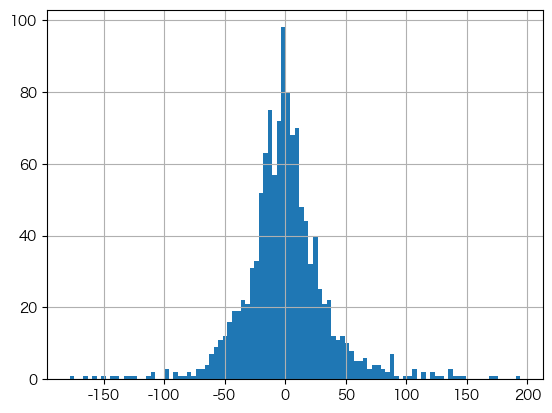

In [22]:
loss_df.hist(bins=100)

使用loss_df的均值和方差进行VaR估计

In [23]:
sim_param_VaR95 = loss_df.mean()+ z_score_95*loss_df.std()
sim_param_VaR99 =   loss_df.mean()+ z_score_99*loss_df.std()

In [24]:
print(f'使用随机模拟方法估计参数再计算VaR95为{sim_param_VaR95}')
print(f'使用随机模拟方法估计参数再计算VaR95为{sim_param_VaR99}')
print('这个结果比较接近')
print('怀疑是因为方差协方差矩阵估计得不准造成第一种参数方法估计误差过大')

使用随机模拟方法估计参数再计算VaR95为58.64315241770049
使用随机模拟方法估计参数再计算VaR95为82.94778411145646
这个结果比较接近
怀疑是因为方差协方差矩阵估计得不准造成第一种参数方法估计误差过大
